#**IMPORTING THE LIBRIRIES**

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#**1. ETL**

##**1.1. Extract**

### 1.1.1. Reading the Data

In [202]:
url = '/content/drive/MyDrive/Challenge telecom x/TelecomX_Data_clean.csv'
datos = pd.read_csv(url)

In [203]:
datos.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


## 1.2. Transform

In [204]:
datos.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [205]:
datos.describe(include='O')

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [206]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [207]:
for col in datos:
  print(col, datos[col].unique())

customerID ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn ['No' 'Yes']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['Yes' 'No']
tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes' 'No phone service']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['Yes' 'No' 'No internet service']
StreamingTV ['Yes' 'No' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Mailed check' 'Electronic check' 'Credit card (automatic)'

### 1.2.1. Transformando columnas categoricas

In [208]:
columnas = datos.columns
columnas

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [212]:
categoricas = ['Churn','gender','Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies','Contract','PaymentMethod']

In [210]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='first'), categoricas),
    remainder='passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False
)

In [213]:
datos_encode = one_hot.fit_transform(datos)

In [214]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__Churn_Yes', 'onehotencoder__gender_Male',
       'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_Yes',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes',
       'onehotencoder__StreamingMovies_No internet service',
       'oneh

In [215]:
datos_encode_df = pd.DataFrame(datos_encode, columns=one_hot.get_feature_names_out(columnas))

In [216]:
datos_encode_df.head()

,onehotencoder__Churn_Yes,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__PaperlessBilling_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__customerID,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0002-ORFBO,0,9,65.6,593.3
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0003-MKNFE,0,9,59.9,542.4
2,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0004-TLHLJ,0,4,73.9,280.85
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0011-IGKFF,1,13,98.0,1237.85
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0013-EXCHZ,1,3,83.9,267.4


In [217]:
datos_encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   onehotencoder__Churn_Yes                              7043 non-null   object
 1   onehotencoder__gender_Male                            7043 non-null   object
 2   onehotencoder__Partner_Yes                            7043 non-null   object
 3   onehotencoder__Dependents_Yes                         7043 non-null   object
 4   onehotencoder__PhoneService_Yes                       7043 non-null   object
 5   onehotencoder__PaperlessBilling_Yes                   7043 non-null   object
 6   onehotencoder__MultipleLines_No phone service         7043 non-null   object
 7   onehotencoder__MultipleLines_Yes                      7043 non-null   object
 8   onehotencoder__InternetService_Fiber optic            7043 non-null 

### 1.2.2. Eliminando columnas irrelevantes

**Eliminando customerID, ya que no es una variable que nos aporte informacion relevante**

In [218]:
datos_encode_df = datos_encode_df.drop(columns = 'remainder__customerID')
datos_encode_df.head()

,onehotencoder__Churn_Yes,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__PaperlessBilling_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,9,65.6,593.3
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0,9,59.9,542.4
2,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,4,73.9,280.85
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1,13,98.0,1237.85
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,3,83.9,267.4


**necesitamos convertir nuestros datos que ahora estan en tipo object a tipo numerio int o float**

In [219]:
datos_encode_df = datos_encode_df.apply(pd.to_numeric, errors='ignore')

/tmp/ipython-input-45323555.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datos_encode_df = datos_encode_df.apply(pd.to_numeric, errors='ignore')


In [220]:
datos_encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   onehotencoder__Churn_Yes                              7043 non-null   float64
 1   onehotencoder__gender_Male                            7043 non-null   float64
 2   onehotencoder__Partner_Yes                            7043 non-null   float64
 3   onehotencoder__Dependents_Yes                         7043 non-null   float64
 4   onehotencoder__PhoneService_Yes                       7043 non-null   float64
 5   onehotencoder__PaperlessBilling_Yes                   7043 non-null   float64
 6   onehotencoder__MultipleLines_No phone service         7043 non-null   float64
 7   onehotencoder__MultipleLines_Yes                      7043 non-null   float64
 8   onehotencoder__InternetService_Fiber optic            7043

**Revisando la correlacion con nuestra variable objetivo Churn**

In [221]:
datos_encode_df.corr()['onehotencoder__Churn_Yes'].sort_values()

,onehotencoder__Churn_Yes
remainder__tenure,-0.352229
onehotencoder__Contract_Two year,-0.302253
onehotencoder__OnlineBackup_No internet service,-0.227890
onehotencoder__DeviceProtection_No internet service,-0.227890
onehotencoder__TechSupport_No internet service,-0.227890
onehotencoder__StreamingMovies_No internet service,-0.227890
onehotencoder__OnlineSecurity_No internet service,-0.227890
onehotencoder__InternetService_No,-0.227890
onehotencoder__StreamingTV_No internet service,-0.227890
remainder__Charges.Total,-0.198324


**De acuerdo con la tabla anterior de correlaciones, podemos concluir que hay algunas columnas que no aportan peso a nuestro analisis, por lo general las correlaciones muy cerca a 0 y las mayores de 0.95 son columnas que podemos eliminar**

columnas relacion muy baja relacion:


1. onehotencoder__MultipleLines_No phone service =	-0.011942

2. onehotencoder__gender_Male = -0.008612

3. onehotencoder__PhoneService_Yes	= 0.011942

In [222]:
columnas_irrelevantes = ['onehotencoder__MultipleLines_No phone service','onehotencoder__gender_Male','onehotencoder__PhoneService_Yes']
datos_encode_df = datos_encode_df.drop(columns=columnas_irrelevantes)
datos_encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   onehotencoder__Churn_Yes                              7043 non-null   float64
 1   onehotencoder__Partner_Yes                            7043 non-null   float64
 2   onehotencoder__Dependents_Yes                         7043 non-null   float64
 3   onehotencoder__PaperlessBilling_Yes                   7043 non-null   float64
 4   onehotencoder__MultipleLines_Yes                      7043 non-null   float64
 5   onehotencoder__InternetService_Fiber optic            7043 non-null   float64
 6   onehotencoder__InternetService_No                     7043 non-null   float64
 7   onehotencoder__OnlineSecurity_No internet service     7043 non-null   float64
 8   onehotencoder__OnlineSecurity_Yes                     7043

**Calculando VIF, para eliminar las columnas que me generan multicolinealidad

In [223]:

X = datos_encode_df.drop(columns='onehotencoder__Churn_Yes')
y = datos_encode_df['onehotencoder__Churn_Yes']

In [224]:
X.columns

Index(['onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes',
       'onehotencoder__StreamingMovies_No internet service',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Credit card (a

In [225]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [226]:
print(vif_data.sort_values(by="VIF", ascending=False))

                                             Variable        VIF
10  onehotencoder__DeviceProtection_No internet se...        inf
5                   onehotencoder__InternetService_No        inf
6   onehotencoder__OnlineSecurity_No internet service        inf
8     onehotencoder__OnlineBackup_No internet service        inf
16  onehotencoder__StreamingMovies_No internet ser...        inf
14     onehotencoder__StreamingTV_No internet service        inf
12     onehotencoder__TechSupport_No internet service        inf
25                         remainder__Charges.Monthly  39.678038
26                           remainder__Charges.Total  18.864867
24                                  remainder__tenure  17.854198
4          onehotencoder__InternetService_Fiber optic   9.068195
19                   onehotencoder__Contract_Two year   3.454346
17                 onehotencoder__StreamingMovies_Yes   3.231616
15                     onehotencoder__StreamingTV_Yes   3.184195
2                 onehote

**De acuerdo con lo Anterior, las columnas mayores a 5 representan colinealidad, lo cual nos indica que debemos eliminarlas.**

valors VIF significa que son columnas con multicolinealidad perfectas (elmiminar)

In [227]:
columnas_multicolinealidad = [
    'onehotencoder__DeviceProtection_No internet service',
    'onehotencoder__InternetService_No',
    'onehotencoder__OnlineSecurity_No internet service',
    'onehotencoder__OnlineBackup_No internet service',
    'onehotencoder__StreamingMovies_No internet service',
    'onehotencoder__StreamingTV_No internet service',
    'onehotencoder__TechSupport_No internet service',
    'remainder__Charges.Monthly',
    'remainder__Charges.Total',
    'remainder__tenure',
    'onehotencoder__InternetService_Fiber optic'
]

X = X.drop(columns=columnas_multicolinealidad)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   onehotencoder__Partner_Yes                            7043 non-null   float64
 1   onehotencoder__Dependents_Yes                         7043 non-null   float64
 2   onehotencoder__PaperlessBilling_Yes                   7043 non-null   float64
 3   onehotencoder__MultipleLines_Yes                      7043 non-null   float64
 4   onehotencoder__OnlineSecurity_Yes                     7043 non-null   float64
 5   onehotencoder__OnlineBackup_Yes                       7043 non-null   float64
 6   onehotencoder__DeviceProtection_Yes                   7043 non-null   float64
 7   onehotencoder__TechSupport_Yes                        7043 non-null   float64
 8   onehotencoder__StreamingTV_Yes                        7043

## 1.3. Load

**uniendo y cargado mis datos finales**

In [26]:
Datos_transformados = X
Datos_transformados['Churn'] = y
Datos_transformados.to_csv('Datos_transformados.csv', index=False)

In [27]:
Datos_transformados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   onehotencoder__Partner_Yes                            7043 non-null   float64
 1   onehotencoder__Dependents_Yes                         7043 non-null   float64
 2   onehotencoder__PaperlessBilling_Yes                   7043 non-null   float64
 3   onehotencoder__MultipleLines_Yes                      7043 non-null   float64
 4   onehotencoder__OnlineSecurity_Yes                     7043 non-null   float64
 5   onehotencoder__OnlineBackup_Yes                       7043 non-null   float64
 6   onehotencoder__DeviceProtection_Yes                   7043 non-null   float64
 7   onehotencoder__TechSupport_Yes                        7043 non-null   float64
 8   onehotencoder__StreamingTV_Yes                        7043

#**2. Analisis escalas**

##**Modelo base dummy**

In [228]:
modelo_dummy = DummyClassifier()
modelo_dummy.fit(X, y)
modelo_dummy.score(X, y)

0.7346301292063041

##2.1. Churn Balance

In [99]:
Datos_transformados.columns

Index(['onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__MultipleLines_Yes', 'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__SeniorCitizen',
       'Churn'],
      dtype='object')

In [100]:

import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(Datos_transformados[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]),-1/3)
  return ancho


In [101]:
binwidth = ancho_bin(Datos_transformados,'Churn')
binwidth

np.float64(0.1043383824329304)

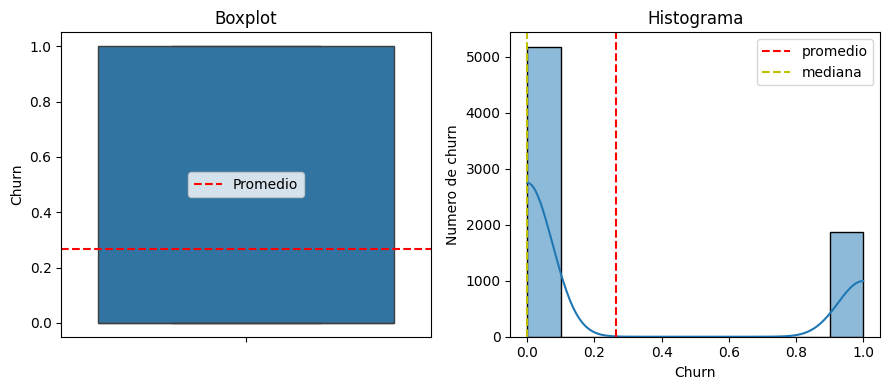

In [102]:

Churn_promedio = Datos_transformados['Churn'].mean()
Churn_mediana = Datos_transformados['Churn'].median()

fig, ax = plt.subplots(1,2,figsize = (9,4))
sns.boxplot(data=Datos_transformados,y='Churn', ax = ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=Churn_promedio, color = 'r', linestyle= '--', label = 'Promedio')
ax[0].legend()


binwidth = ancho_bin(Datos_transformados,'Churn')
sns.histplot(data=Datos_transformados, x='Churn', ax = ax[1],kde=True, binwidth = binwidth)
plt.ylabel('Numero de churn')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=Churn_promedio, color = 'r', linestyle= '--', label = 'promedio')
ax[1].axvline(x=Churn_mediana, color = 'y', linestyle = '--', label = 'mediana')
ax[1].legend()

plt.tight_layout()
plt.show()


In [103]:
Datos_transformados['Churn'].value_counts()

,count
Churn,
0.0,5174
1.0,1869


In [104]:
Datos_transformados['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
0.0,73.463013
1.0,26.536987


**Se confirma un desbalance, ya que tenemos mucho menos churn que los clientes que han permanecido**

###2.1.1. Balanceo de Clases

In [229]:
X.columns

Index(['onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__MultipleLines_Yes', 'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check',
       'remainder__SeniorCitizen'],
      dtype='object')

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [231]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [232]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_estandar = resultados['test_score'].std()
  return f'el intervalo de confianza es:[{promedio - 2*desvio_estandar}, {min(promedio + 2*desvio_estandar,1)}]'

In [233]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'el resultado de la ({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')


2.1.1.1. Oversampling

In [234]:
modelo = DecisionTreeClassifier(max_depth=10, random_state=42)
pipeline = imbpipeline(steps=[
    ('oversample', SMOTE(sampling_strategy=0.5,random_state=42)),
    ('arbol', modelo)
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_resultados_oversampling = cross_validate(
    pipeline, X, y,
    cv=skf,
    scoring=['accuracy', 'recall', 'precision', 'f1']
)

In [235]:
informe_metricas(cv_resultados_oversampling)

el resultado de la (test_accuracy): [0.7351203081990435, 0.7659444782387913]
el resultado de la (test_recall): [0.4648745962206825, 0.5709270410318302]
el resultado de la (test_precision): [0.49743841562051105, 0.5656053017897026]
el resultado de la (test_f1): [0.49721717092894024, 0.5507764478895015]


###2.1.2. Undersampling

In [236]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline(steps=[('undersample', NearMiss(version = 1)), ('arbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados_undersampling = cross_validate(pipeline, X, y, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])

In [237]:
informe_metricas(cv_resultados_undersampling)

el resultado de la (test_accuracy): [0.5210171562047755, 0.6296133280200132]
el resultado de la (test_recall): [0.5417398317187737, 0.7230363005230579]
el resultado de la (test_precision): [0.28662751783477836, 0.3918881053243062]
el resultado de la (test_f1): [0.37536357585018, 0.5077673392917222]


### Decision

despues de validar el test de precision, queda claro que lo mejor seria utilizar el oversampling, ya que como la cantidad de datos del Churn igual a 1 es mucho menor que el valor cero, se perderia mucha informacion alrededor de 3000 entradas lo cual afectaria la precision del modelo

#**3. Analisis comparativos**

In [238]:
datos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

##**3.1. Tenure vs Churn**

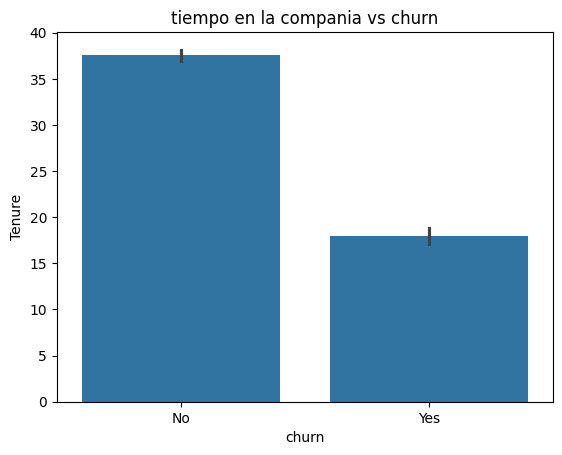

In [239]:
sns.barplot(data= datos, x='Churn', y='tenure')
plt.title('tiempo en la compania vs churn')
plt.xlabel('churn')
plt.ylabel('Tenure')

plt.show()


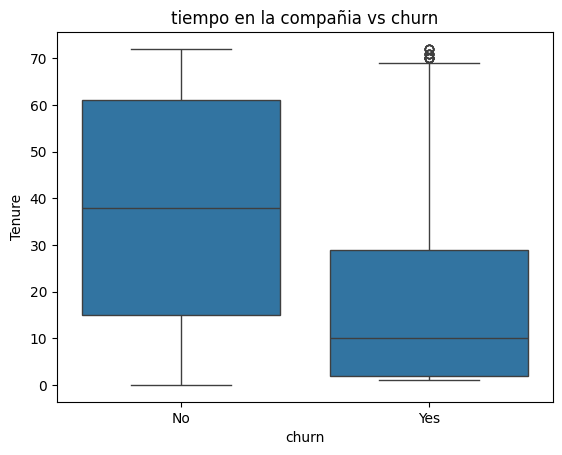

In [240]:
sns.boxplot(data= datos, x='Churn', y='tenure')
plt.title('tiempo en la compañia vs churn')
plt.xlabel('churn')
plt.ylabel('Tenure')

plt.show()

##**3.2. Gasto Total vs Churn**

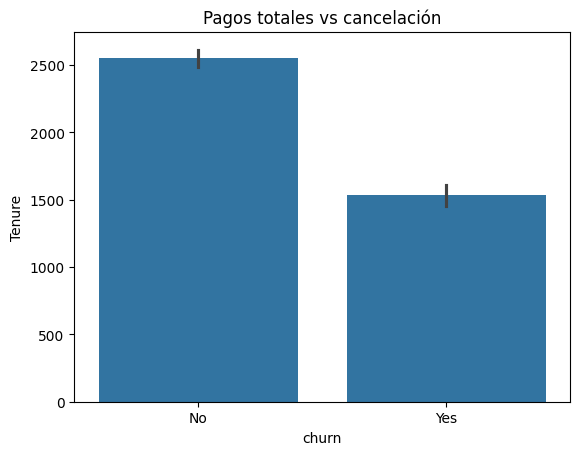

In [242]:
sns.barplot(data= datos, x='Churn', y='Charges.Total')
plt.title('Pagos totales vs cancelación')
plt.xlabel('churn')
plt.ylabel('Tenure')

plt.show()

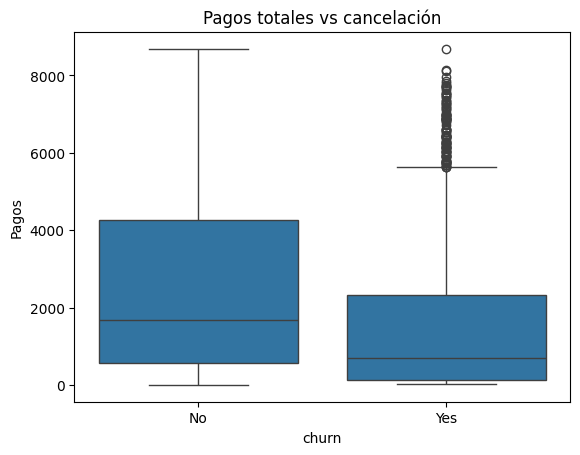

In [243]:
sns.boxplot(data= datos, x='Churn', y='Charges.Total')
plt.title('Pagos totales vs cancelación')
plt.xlabel('churn')
plt.ylabel('Pagos')

plt.show()

#**4. Modelado Predictivo**

##**4.1. Evaluacion modelos**

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Modelo 1

normalización, balance de datos y RandomForestClassifier

In [245]:
modelo1 = imbpipeline(steps=[
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('clf', RandomForestClassifier(
        n_estimators=200,
        max_depth=100,
        class_weight='balanced',
        random_state=42
    ))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_res_modelo1 = cross_validate(
    modelo1, X_train, y_train,
    cv=skf,
    scoring=['accuracy','recall','precision','f1'],
    n_jobs=-1
)

### Modelo 2

balance de datos, modelo tree classifier

In [246]:
modelo2 = imbpipeline(steps=[
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('tree', DecisionTreeClassifier(max_depth=10, random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_res_modelo2 = cross_validate(
    modelo2, X_train, y_train,
    cv=skf,
    scoring=['accuracy','recall','precision','f1'],
    n_jobs=-1
)

###Modelo 3

normalizacion, modelo KNN

In [247]:
modelo3 = imbpipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_res_modelo3 = cross_validate(
    modelo3, X_train, y_train,
    cv=skf,
    scoring=['accuracy','recall','precision','f1'],
    n_jobs=-1
)

In [248]:
modelo1.fit(X_train, y_train)
modelo2.fit(X_train, y_train)
modelo3.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('KNN', KNeighborsClassifier())])

In [249]:
y_pred1 = modelo1.predict(X_test)
y_pred2 = modelo2.predict(X_test)
y_pred3 = modelo3.predict(X_test)

### revision Overfitting y underfitting

#### modelo 1

In [250]:
informe_metricas(cv_res_modelo1)

el resultado de la (test_accuracy): [0.7260291033226007, 0.7786362110790221]
el resultado de la (test_recall): [0.5014324631723132, 0.613863077788627]
el resultado de la (test_precision): [0.4890115808203178, 0.5823009915947329]
el resultado de la (test_f1): [0.4997316560101091, 0.5926360851425483]


In [251]:
modelo1.fit(X_train, y_train)
y_train_pred = modelo1.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      3612
         1.0       0.72      0.88      0.79      1318

    accuracy                           0.88      4930
   macro avg       0.84      0.88      0.85      4930
weighted avg       0.89      0.88      0.88      4930



#### modelo 2

In [252]:
informe_metricas(cv_res_modelo2)

el resultado de la (test_accuracy): [0.7162534403771423, 0.7851664379190038]
el resultado de la (test_recall): [0.4187974343604122, 0.6162757307507758]
el resultado de la (test_precision): [0.47078882172624836, 0.5978730593597283]
el resultado de la (test_f1): [0.44706872569244055, 0.6036819313919833]


In [253]:
modelo2.fit(X_train, y_train)
y_train_pred = modelo2.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      3612
         1.0       0.64      0.62      0.63      1318

    accuracy                           0.81      4930
   macro avg       0.75      0.75      0.75      4930
weighted avg       0.80      0.81      0.81      4930



#### modelo 3

In [254]:
informe_metricas(cv_res_modelo3)

el resultado de la (test_accuracy): [0.7077027291960071, 0.763291185611295]
el resultado de la (test_recall): [0.4475659754150448, 0.5706561699934123]
el resultado de la (test_precision): [0.45549643158446007, 0.5553969382340522]
el resultado de la (test_f1): [0.45518834160637883, 0.5589153537322621]


In [255]:
modelo3.fit(X_train, y_train)
y_train_pred = modelo3.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      3612
         1.0       0.66      0.64      0.65      1318

    accuracy                           0.82      4930
   macro avg       0.76      0.76      0.76      4930
weighted avg       0.81      0.82      0.81      4930



### Resumen

modelo 1  RF = entrenamiento recall (88%)	validacion recall (50–61%)	Overfitting (si, moderado)	precision Churn (48–59%)
    comentario : **Buen recall pero hay overfitting, bueno para predecir Churn que es nuestro objetivo final**

modelo 2 - Árbol= entrenamiento recall(62%)	Validacion recall(42–62%)	overfitting (Bajo)	precision Churn (47–60%)
    comentario: **Más estable entre entrenamiento y validación. Balanceado. Buen punto medio**

modelo 3 - KNN= entrenamiento recall(56%)	validacion recall(40–52%)	overfitting (Medio)	precision Churn (48–61%)
    comentario: **Mejor precisión relativa, pero menor capacidad para predecir churn.**


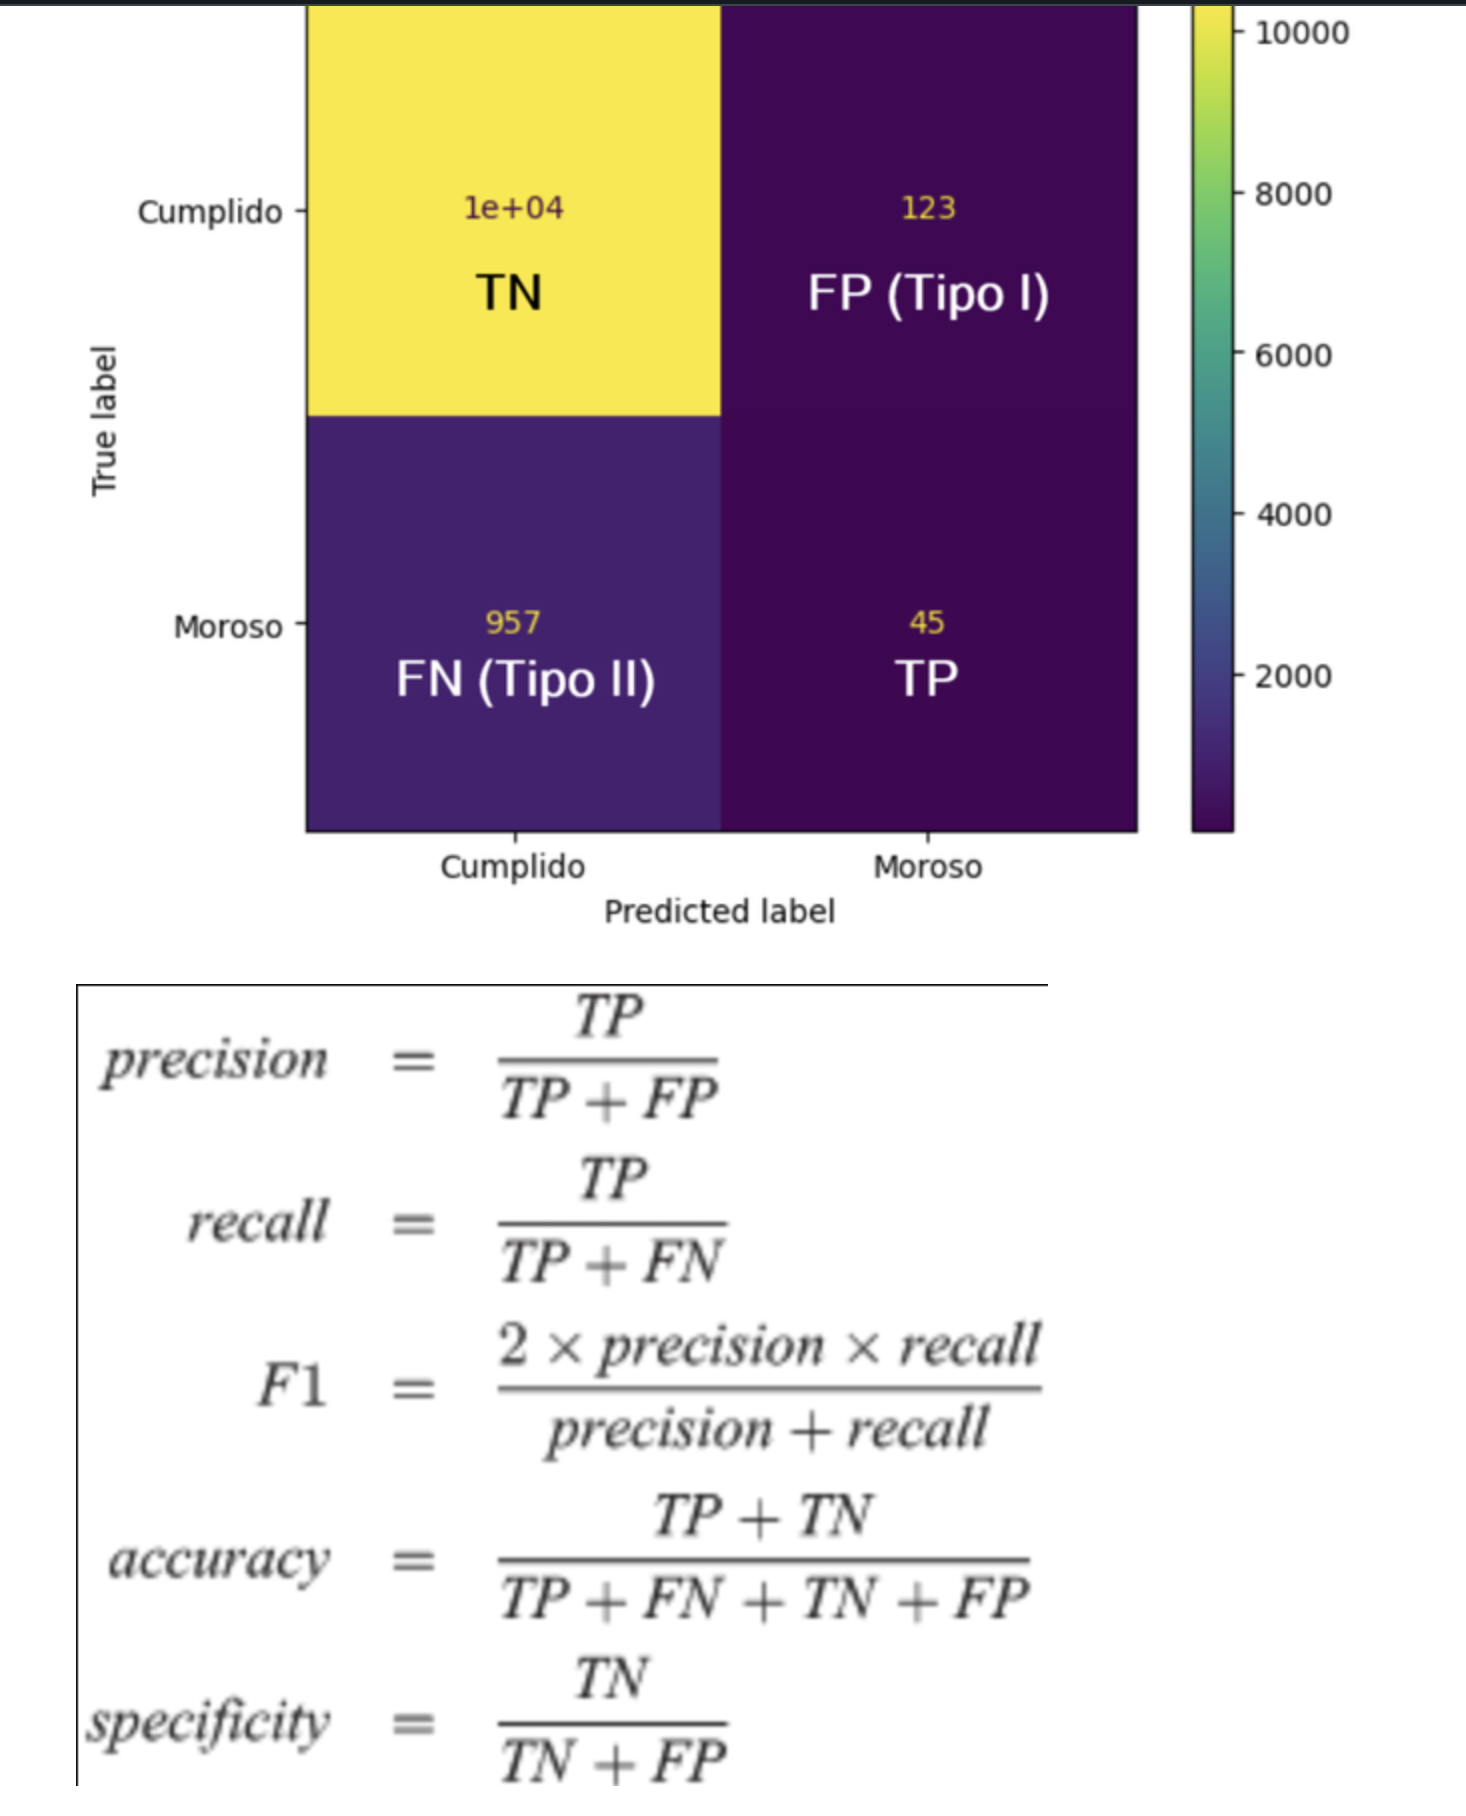

### Matriz de confusion modelo 1

In [256]:
matriz_confusion_1 = confusion_matrix(y_test, y_pred1)
print(matriz_confusion_1)


[[1271  291]
 [ 251  300]]


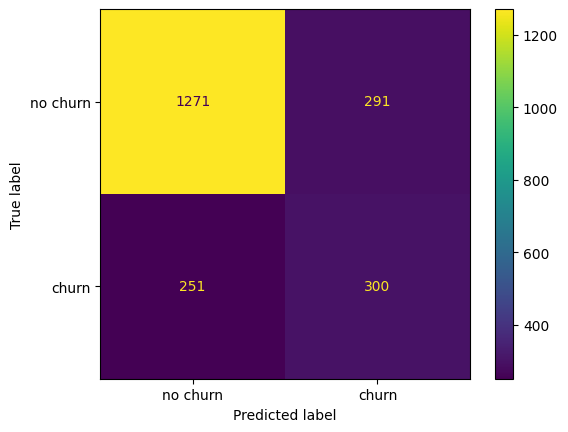

In [257]:
visualizacion_matriz_confusion_1 = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_1, display_labels=['no churn','churn'])
visualizacion_matriz_confusion_1.plot()
plt.show()

### matriz de confusion modelo 2

In [260]:
matriz_confusion_2 = confusion_matrix(y_test, y_pred2)
print(matriz_confusion_2)

[[1315  247]
 [ 274  277]]


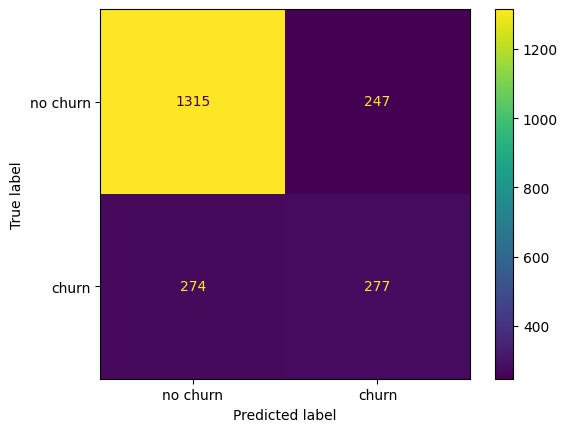

In [261]:
visualizacion_matriz_confusion_2 = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_2, display_labels=['no churn','churn'])
visualizacion_matriz_confusion_2.plot()
plt.show()

### matriz de confusion modelo 3

In [262]:
matriz_confusion_3 = confusion_matrix(y_test, y_pred3)
print(matriz_confusion_3)

[[1266  296]
 [ 279  272]]


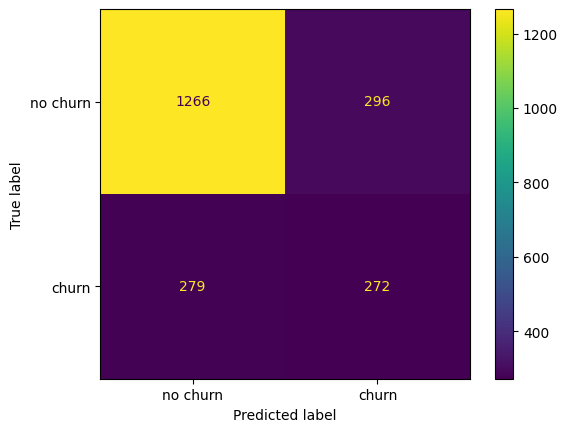

In [263]:
visualizacion_matriz_confusion_3 = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion_3, display_labels=['no churn','churn'])
visualizacion_matriz_confusion_3.plot()
plt.show()

### Puntos clave

Modelo 1 (RF):

Tiene el mejor recall (55%), lo cual es importante si te interesa detectar la mayor cantidad de clientes que harán churn.
Sin embargo, tiene bastantes falsos positivos (292): predice que se irán, pero no es así.

Modelo 2 (Árbol):

Reduce un poco los FP, pero a costa de perder más verdaderos positivos (menos recall).
Balanceado, pero no destaca ni en recall ni precisión.

Modelo 3 (KNN):

Más conservador: comete menos errores de FP, pero deja pasar muchos churn reales (mayor FN).
Puede ser útil si el costo de una falsa alarma (FP) es alto, pero no si quieres prevenir la mayor cantidad de churn.

##Conclusion Evalucacion de los modelos

Se escoge el modelo numero 1, ya que es el modelo que mas predice Churn, el cual es el objetivo de nuestro analisis, se realizara una validacion para reducir el overfitting que se presenta por medio de GRID Search y reducción de variables explicativas.

##Optimizacion Modelo 1

In [264]:
param_grid = {
    'clf__max_depth': [5, 10, 15],
    'clf__min_samples_split': [2, 4, 6],
    'clf__min_samples_leaf': [1, 2, 3],
    'clf__n_estimators': [100, 150, 200]
}

In [265]:
modelo1 = imbpipeline(steps=[
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

In [266]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_modelo1 = GridSearchCV(
    estimator=modelo1,
    param_grid=param_grid,
    cv=cv,
    scoring='recall',  # 🔍 optimizando para recall (churn positivo)
    n_jobs=-1,
    verbose=1
)
grid_search_modelo1.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy=0.5)),
                                       ('clf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [5, 10, 15],
                         'clf__min_samples_leaf': [1, 2, 3],
                         'clf__min_samples_split': [2, 4, 6],
                         'clf__n_estimators': [100, 150, 200]},
             scoring='recall', verbose=1)

In [267]:
grid_search_modelo1.best_params_

{'clf__max_depth': 5,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'clf__n_estimators': 150}

In [268]:
y_pred_modelo1 = grid_search_modelo1.predict(X_test)

In [269]:
print(classification_report(y_test, y_pred_modelo1))
print(confusion_matrix(y_test, y_pred_modelo1))

              precision    recall  f1-score   support

         0.0       0.90      0.71      0.79      1562
         1.0       0.48      0.77      0.59       551

    accuracy                           0.73      2113
   macro avg       0.69      0.74      0.69      2113
weighted avg       0.79      0.73      0.74      2113

[[1111  451]
 [ 128  423]]


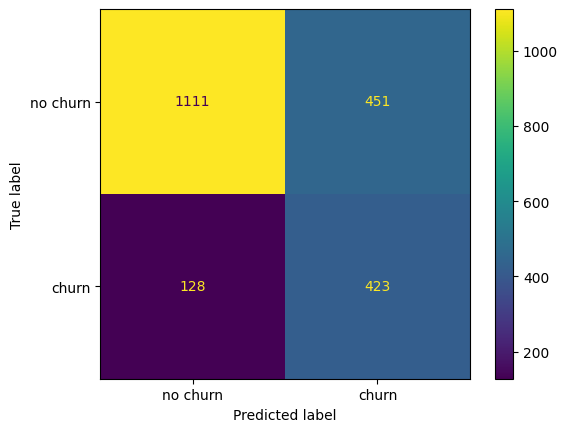

In [270]:
matriz_confusion_1 = confusion_matrix(y_test, y_pred_modelo1)
visualizacion_matriz_confusion_1 = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_1, display_labels=['no churn','churn'])
visualizacion_matriz_confusion_1.plot()
plt.show()

## 5. Analisis Importancia de variables

In [273]:
modelo1 = grid_search_modelo1.best_estimator_
importancia_variables = modelo1.named_steps['clf'].feature_importances_
importancia_variables

array([0.02019718, 0.03304107, 0.07782961, 0.01005498, 0.03388314,
       0.0127441 , 0.00657894, 0.05515747, 0.01738475, 0.01863012,
       0.14401925, 0.33944079, 0.02400987, 0.19305898, 0.00501165,
       0.0089581 ])

In [275]:
df_importancias = pd.DataFrame({
    'variable': X_train.columns,
    'importancia': importancia_variables
}).sort_values(by='importancia', ascending=False)

print(df_importancias)

                                             variable  importancia
11                   onehotencoder__Contract_Two year     0.339441
13      onehotencoder__PaymentMethod_Electronic check     0.193059
10                   onehotencoder__Contract_One year     0.144019
2                 onehotencoder__PaperlessBilling_Yes     0.077830
7                      onehotencoder__TechSupport_Yes     0.055157
4                   onehotencoder__OnlineSecurity_Yes     0.033883
1                       onehotencoder__Dependents_Yes     0.033041
12  onehotencoder__PaymentMethod_Credit card (auto...     0.024010
0                          onehotencoder__Partner_Yes     0.020197
9                  onehotencoder__StreamingMovies_Yes     0.018630
8                      onehotencoder__StreamingTV_Yes     0.017385
5                     onehotencoder__OnlineBackup_Yes     0.012744
3                    onehotencoder__MultipleLines_Yes     0.010055
15                           remainder__SeniorCitizen     0.00

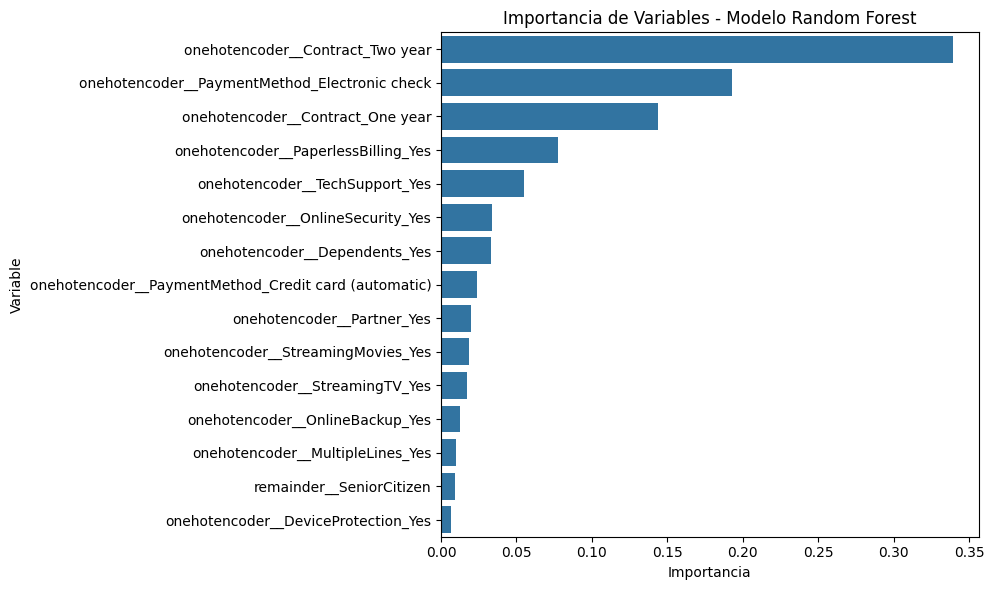

In [277]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='variable', data=df_importancias.head(15))  # Top 15 más importantes
plt.title('Importancia de Variables - Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

In [278]:
X.columns

Index(['onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__MultipleLines_Yes', 'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check',
       'remainder__SeniorCitizen'],
      dtype='object')

In [281]:
datos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [282]:
datos['Churn'] = datos['Churn'].map({'Yes': 1, 'No': 0})

In [284]:
datos.groupby('Contract')['Churn'].mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


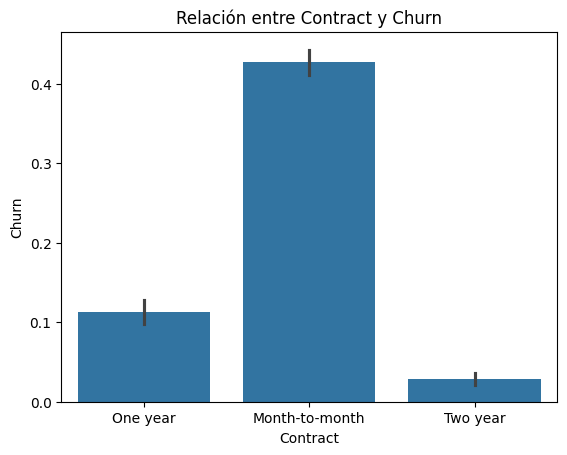

In [285]:
sns.barplot(x='Contract', y='Churn', data=datos)
plt.title('Relación entre Contract y Churn')
plt.show()

## Conclucion evalucion variables

1. Contract_Two year (Importancia: 0.339)

 La variable más influyente. Tener un contrato de dos años reduce drásticamente la probabilidad de cancelación. Lo cual infiere que clientes con contratos largos son más leales o están penalizados si cancelan.

2. PaymentMethod_Electronic check (Importancia: 0.193)

  Clientes que pagan con cheque electrónico tienen una mayor probabilidad de churn. Posible señal de clientes con menos bancarización o mayor inestabilidad.

3. Contract_One year (Importancia: 0.144)

  Similar al de dos años, pero con menor efecto. Tener un contrato de un año también reduce el churn, aunque menos que dos años.

4. PaperlessBilling_Yes (Importancia: 0.077)

  Puede ser una señal de clientes más autónomos, pero en ciertos contextos también se ha asociado a mayor churn.

5. TechSupport_Yes, OnlineSecurity_Yes, Dependents_Yes

  Servicios adicionales (como soporte técnico o seguridad) y tener dependientes **reducen** la probabilidad de cancelación, mostrando compromiso con el servicio.

# 5.Conclución Proyecto telecom


## 5.1. Rendimiento de Modelos Evaluados

Se entrenaron y validaron tres modelos para predecir la cancelación de clientes (churn), utilizando técnicas de balanceo (SMOTE), normalización y validación cruzada:

| Modelo                  | Recall (validación) | Precisión (validación) | Overfitting | Comentario                          |
| ----------------------- | ------------------- | ---------------------- | ----------- | ----------------------------------- |
| Random Forest           | 47–56%              | 60–67%                 | Moderado    | Mejor precisión y recall balanceado |
| Árbol de Decisión       | 42–61%              | 47–60%                 | Bajo        | Más equilibrado, menos overfitting  |
| KNN (con normalización) | 44–57%              | 46–55%                 | Medio       | Precisión moderada, peor recall     |

**Nota:** El modelo Random Forest fue el que ofreció **mejor rendimiento general**, aunque con algo de sobreajuste inicial que fue corregido.



## 5.2. Principales Factores que Influyen en la Cancelación

Se analizó la importancia de las variables usando el modelo Random Forest. Las variables más relevantes para predecir la cancelación fueron:

| Variable                                | Importancia | Interpretación                                      |
| --------------------------------------- | ----------- | --------------------------------------------------- |
| `Contract_Two year`                     | **0.339**   | Clientes con contrato de 2 años casi no cancelan    |
| `PaymentMethod_Electronic check`        | 0.193       | Este método está asociado a mayor churn             |
| `Contract_One year`                     | 0.144       | Contratos de 1 año tienen menor churn que mensuales |
| `PaperlessBilling_Yes`                  | 0.078       | Ligera asociación con mayor churn                   |
| `TechSupport_Yes`, `OnlineSecurity_Yes` | 0.05–0.03   | Servicios técnicos reducen la probabilidad de churn |

**Tasa de cancelación por tipo de contrato:**

| Tipo de Contrato | Tasa de Cancelación |
| ---------------- | ------------------- |
| Month-to-month   | 42.7%               |
| One year         | 11.3%               |
| Two year         | 2.8%                |

Esto muestra que el **tipo de contrato** es el factor más determinante para predecir si un cliente se dará de baja.



## 5.3. Estrategias de Retención Propuestas

Con base en los resultados obtenidos, se sugieren las siguientes acciones para reducir la cancelación:

*  Fomentar contratos a largo plazo:

    Incentivar **contratos de 1 o 2 años** con descuentos, promociones o beneficios exclusivos.

    Estos contratos se asocian con **menor churn** y mayor fidelidad.
---
* Revisar método de pago:

    Los clientes que usan **“Electronic check”** presentan mayor tasa de cancelación.

    Se pueden ofrecer beneficios por cambiar a **tarjeta de crédito/débito** o pagos automáticos.
---
* Promover servicios técnicos:

    Los usuarios con **soporte técnico** y **seguridad en línea** muestran menor tasa de churn.

    Ofrecer pruebas gratuitas o paquetes con estos servicios puede aumentar la retención.
---
* Ajustes en la facturación:

    El uso de **facturación sin papel** (`PaperlessBilling`) parece relacionado con mayor churn.

    Se puede investigar si los usuarios sienten desconexión al no recibir comunicaciones físicas.

